In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [ ]:
def read_with_sniff(path):
  with open(path, 'r', encoding='utf-8', errors='replace') as f:
    sample = f.read()
    f.seek(0)
    try:
      dialect = csv.Sniffer().sniff(sample, delimiters=[',', ';', '\t', '|'])
      delim = dialect.delimiter
    except Exception:
      delim = ';'

  df = pd.read_csv(path, sep=delim)
  return df, delim

# EDA (Explorasi Data Analysis)

In [ ]:
bank, delim1 = read_with_sniff("/content/drive/MyDrive/bank.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
# Cek 5 Baris Awal dan 5 baris akhir

cekAwal = bank.head(5)
cekAwal

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# 5 baris akhir

cekAkhir = bank.tail(5)
cekAkhir

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
# Cek information about dataset
print("\n Cek Information About Dataset ")
bank.info()


 Cek Information About Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# Cek Ukuran

print("\n Ukuran Dataset ")
bank.shape


 Ukuran Dataset 


(4521, 17)

In [ ]:
# Hitung nilai kolom kategorikal

Nilai = bank['y'].value_counts()
Nilai

,count
y,
no,4000
yes,521


In [ ]:
# Jumlah Job

JumlahJob = bank['job'].value_counts()
JumlahJob

,count
job,
management,969
blue-collar,946
technician,768
admin.,478
services,417
retired,230
self-employed,183
entrepreneur,168
unemployed,128


In [ ]:
# Hitung Nilai Hilang atau Missing Value

MissingValue = bank.isnull().sum()
MissingValue

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Cek Duplikat

cekDuplikat = bank.duplicated().sum()
cekDuplikat

np.int64(0)

In [ ]:
# jumlah martial

jumlahMartial = bank['marital'].value_counts()
jumlahMartial

,count
marital,
married,2797
single,1196
divorced,528


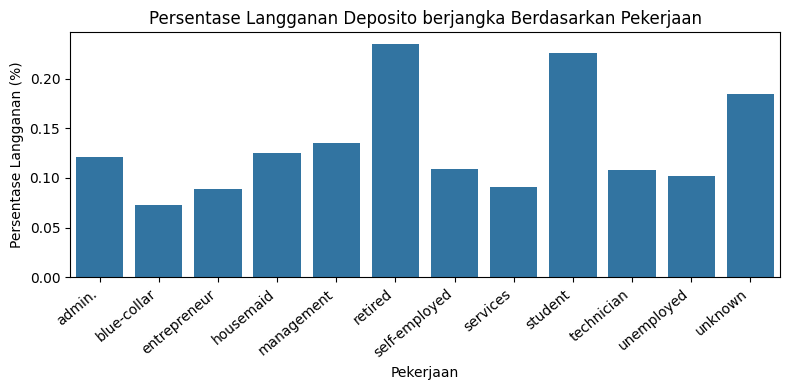

In [ ]:
# Calculate the proportion of 'yes' for each job
job_y_counts = bank.groupby('job')['y'].value_counts(normalize=True).unstack()
job_y_proportion = job_y_counts['yes'].reset_index()
job_y_proportion.columns = ['job', 'proportion']

# Visualisasi Data
plt.figure(figsize=(8,4))
sns.barplot(x='job', y='proportion', data=job_y_proportion)
plt.title('Persentase Langganan Deposito berjangka Berdasarkan Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Persentase Langganan (%)')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

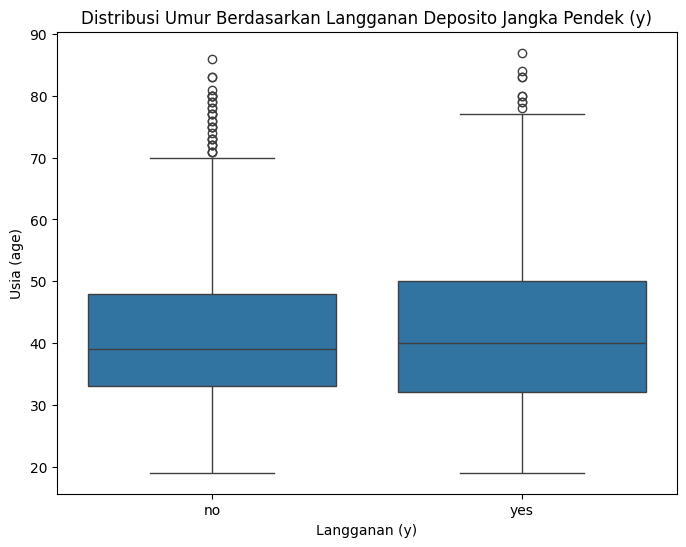

In [ ]:
# 1. Bivariate Analysis for Numerical Feature: 'age' vs 'y' (Target)
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=bank)
plt.title('Distribusi Umur Berdasarkan Langganan Deposito Jangka Pendek (y)')
plt.xlabel('Langganan (y)')
plt.ylabel('Usia (age)')
plt.show()

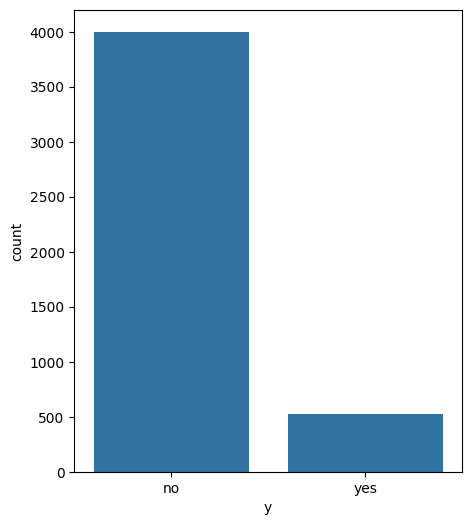

In [ ]:
# Bar plot untuk Y

plt.figure(figsize=(5,6))
sns.countplot(x='y', data=bank)
distribusi = bank['y'].value_counts()

# Data Preparation

5.1 Data Cleaning
- Handling missing values
- Removing duplicates
- Handling outliers
- Data type conversion

In [ ]:
# 5.1 Handling Missing Value

# Handling Missing Value
bank = bank.drop('duration', axis=1)
print("Kolom Duration telah terhapus")

# Handle Special Value -1 in pdays
bank['pdays'] = bank['pdays'].replace(-1, 999)
print("Nilai -1 pada kolom pdays Telah diubah menjadi 999")

Kolom Duration telah terhapus
Nilai -1 pada kolom pdays Telah diubah menjadi 999


In [ ]:
# 5.2 Removing Duplicatet

cekDuplikat = len(bank)
bank.drop_duplicates(inplace=True)
cekSetelahDrop = len(bank)
print(f"Jumlah Duplikat Setelah Dihapus: ", {cekDuplikat - cekSetelahDrop})

Jumlah Duplikat Setelah Dihapus:  {0}


In [ ]:
# 5.3 Handling Outliers

numerik_fitur = ['balance', 'campaign']

for col in numerik_fitur:
  upper_limit = bank[col].quantile(0.95)
  bank[col] = np.where(bank[col] > upper_limit, upper_limit, bank[col])
  print(f"Outliers pada kolom {col} telah dibatasi pada Quantile 92 ({upper_limit:.2f}).")

Outliers pada kolom balance telah dibatasi pada Quantile 92 (6102.00).
Outliers pada kolom campaign telah dibatasi pada Quantile 92 (8.00).


In [ ]:
# 5.4 Data Conversation

bank['y'] = bank['y'].map({'yes': 1, 'no': 0})
print("Variabel Target y telah dikonversi menjadi bilangan binner (1=yes, 0=no  )")

# Tampilkan setelah dilakukan cleaning
print("\nInformasi Data Setelah Data Cleaning ")
print(bank.head().to_markdown(index=False, numalign="left", stralign="left "))

Variabel Target y telah dikonversi menjadi bilangan binner (1=yes, 0=no  )

Informasi Data Setelah Data Cleaning 
| age   |         job |   marital |   education |   default | balance   |   housing |   loan |   contact | day   |   month | campaign   | pdays   | previous   |   poutcome | y   |
|:------|-------------|-----------|-------------|-----------|:----------|-----------|--------|-----------|:------|---------|:-----------|:--------|:-----------|------------|:----|
| 30    | unemployed  | married   | primary     | no        | 1787      | no        | no     | cellular  | 19    | oct     | 1          | 999     | 0          | unknown    | 0   |
| 33    | services    | married   | secondary   | no        | 4789      | yes       | yes    | cellular  | 11    | may     | 1          | 339     | 4          | failure    | 0   |
| 35    | management  | single    | tertiary    | no        | 1350      | yes       | no     | cellular  | 16    | apr     | 1          | 330     | 1          | failu

5.2 Feature Engineering
- Creating new features
- Feature extraction
- Feature selection
- Dimensionality reduction

In [ ]:
# 1. Creating new Feature

bank['previously_contact'] = np.where(bank['pdays'] != 999, 1, 0)
print("Kolom prevously_contact telah dibuat ")

# Create negativee Balance
bank['negative_balanced'] = np.where(bank['balance'] < 0, 1, 0)
print("Negfgative Kolom Berhasil Dibuat")

# Create Category Group in pdays
def categorize_pdays(pdays):
  if pdays == 999:
    return 'Not Contacted'
  elif pdays < 30:
    return 'Fresh Contacted'
  elif pdays < 90:
    return 'Regular Contacted'
  else:
    return 'Old Contacted'

bank['pdays_group'] = bank['pdays'].apply(categorize_pdays)
print("Kolom pdays telah dibuat")

Kolom prevously_contact telah dibuat 
Negfgative Kolom Berhasil Dibuat
Kolom pdays telah dibuat


In [ ]:
# Feature Extraction

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov':11, 'dec': 12}

bank['month_num'] = bank['month'].map(month_mapping)
print("Fitur Month Number berhasil Di ekstrak")

Fitur Month Number berhasil Di ekstrak


In [ ]:
# 5.3 Feature Slection

# Drop TO column predictive feature

columns_to_drop = ['day', 'poutcome', 'month']
existing_columns_to_drop = [col for col in columns_to_drop if col in bank.columns]

if existing_columns_to_drop:
    bank = bank.drop(existing_columns_to_drop, axis=1)
    print(f"Kolom {existing_columns_to_drop} telah terhapus")
else:
    print("Tidak ada kolom yang perlu dihapus dari daftar yang ditentukan karena semuanya sudah tidak ada.")

# Display the head of the engineering data
print("\nData setelah Feature Engineering")
print(bank.head().to_markdown(index=False, numalign='left', stralign = "left"))

Kolom ['day', 'poutcome', 'month'] telah terhapus

Data setelah Feature Engineering
| age   | job         | marital   | education   | default   | balance   | housing   | loan   | contact   | campaign   | pdays   | previous   | y   | previously_contact   | negative_balanced   | pdays_group   | month_num   |
|:------|:------------|:----------|:------------|:----------|:----------|:----------|:-------|:----------|:-----------|:--------|:-----------|:----|:---------------------|:--------------------|:--------------|:------------|
| 30    | unemployed  | married   | primary     | no        | 1787      | no        | no     | cellular  | 1          | 999     | 0          | 0   | 0                    | 0                   | Not Contacted | 10          |
| 33    | services    | married   | secondary   | no        | 4789      | yes       | yes    | cellular  | 1          | 339     | 4          | 0   | 1                    | 0                   | Old Contacted | 5           |
| 35    | management

In [ ]:
# Dimensionality Reduction

X = bank.drop('y', axis=1)
y = bank['y']

X_encoded = pd.get_dummies(bank, drop_first=True)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4521 non-null   int64  
 1   job                 4521 non-null   object 
 2   marital             4521 non-null   object 
 3   education           4521 non-null   object 
 4   default             4521 non-null   object 
 5   balance             4521 non-null   float64
 6   housing             4521 non-null   object 
 7   loan                4521 non-null   object 
 8   contact             4521 non-null   object 
 9   campaign            4521 non-null   float64
 10  pdays               4521 non-null   int64  
 11  previous            4521 non-null   int64  
 12  y                   4521 non-null   int64  
 13  previously_contact  4521 non-null   int64  
 14  negative_balanced   4521 non-null   int64  
 15  pdays_group         4521 non-null   object 
 16  month_

5.3 Data Transformation (Untuk Data Tabular)
- Encoding (Label Encoding, One-Hot Encoding, Ordinal Encoding)
- Scaling (Standardization, Normalization, MinMaxScaler)

In [ ]:
# 1. Mendefinisikan Kelompok Fitur

# Fitur numerik
numerik_fitur = ['age', 'pdays', 'campaign', 'balance', 'previous', 'month_num']

# Fitur Ordinal
ordinal_fitur = ['default', 'housing', 'loan', 'education', 'pdays_group']

# Mendefinisikan untuk kategori ordinal encoding
education_mapping = ['unknown', 'primary', 'secondary','tertiary'] # Corrected typo
pdays_group_mapping = ['Not Contacted', 'Fresh Contacted', 'Regular Contacted', 'Old Contacted'] # Corrected typo

# Fitur Kategori
kategori_fitur = ['job', 'marital', 'contact'] # Corrected typo

In [ ]:
# 2. Membuat ColumnTransformer

preprocesor = ColumnTransformer([

    # Transformasi 1 : Srandard Scaling untu, fitru Numerik
    ('numerik', StandardScaler(), numerik_fitur),

    # Transformasi 2 : Ordinal Encoding Untuk fitur ordinal
    ('ord', OrdinalEncoder(categories = [
        ['no', 'yes'],
        ['no', 'yes'],
        ['no', 'yes'],
        education_mapping,
        pdays_group_mapping
    ]), ordinal_fitur),

    # Transformasi 3 : One Hot Encoding untuk Fitur Nominal
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), kategori_fitur)
],
    remainder='passthrough'
)

In [ ]:
# X_encoded = pd.get_dummies(bank, drop_first=True)

# 5.4 Data Splitting

In [ ]:
X = bank.drop('y', axis=1)
y = bank['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.decomposition import PCA

X_train_scaled = preprocesor.fit_transform(X_train)
X_test_scaled = preprocesor.transform(X_test)

In [ ]:
pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Fitur sebelum PCA:", X_train.shape[1])
print("Fitur setelah PCA:", X_train_pca.shape[1])

Fitur sebelum PCA: 16
Fitur setelah PCA: 15


In [ ]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

5.5 Data Balancing (jika diperlukan) Teknik yang digunakan:

- SMOTE (Synthetic Minority Over-sampling Technique)
- Random UndersamplingClass weights
- Ensemble sampling

In [ ]:
# Base model
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs')

pipe = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(
        solver='lbfgs',
        max_iter=5000
    ))
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'previously_contact',
       'negative_balanced', 'month_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'pdays_group'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('logreg', LogisticRegression(max_iter=5000))])

In [ ]:

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       801
           1       0.19      0.63      0.29       104

    accuracy                           0.64       905
   macro avg       0.56      0.64      0.52       905
weighted avg       0.85      0.64      0.71       905

ROC AUC: 0.6959329684048785


In [ ]:
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__class_weight': [None, 'balanced'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_

Best params: {'logreg__C': 0.01, 'logreg__class_weight': None, 'logreg__penalty': 'l2'}


# 5.6 Ringkasan Data Preparation
Per langkah, jelaskan:

- Apa yang dilakukan [Jelaskan ]
- Mengapa penting [Jelaskan Mengapa ?]
- Bagaimana implementasinya [Jelaskan Bagaimana]

# 6. Modeling

## Deskripsi Model 1 (Baseline Model)


In [ ]:
# Hyperparameter

params = {
    "solver": ["liblinear", "lbfgs"],
    "C": [0.01, 0.1, 1, 10],
    "class_weight": [None, "balanced"],
    "max_iter": [200, 500]
}


In [ ]:
# --- MODEL ---

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

report = classification_report(y_test, y_pred, output_dict=True)
Auc = roc_auc_score(y_test, y_proba)

In [ ]:
# Hasil Awal

print("Hasil model logistiv regression")

# Define LR metrics
acc_lr = report["accuracy"]
auc_lr = Auc
f1_lr = report["1"]["f1-score"] # F1-score for class 1 (yes)

result = {
    "Logistic Regression" : {
        "Accuracy" : round(acc_lr, 4),
        "AUC" : round(auc_lr, 4),
        "Recall_1" : round(report["1"]["recall"], 4)
    }
}

pd.DataFrame(result).T

Hasil model logistiv regression


,Accuracy,AUC,Recall_1
Logistic Regression,0.6508,0.6998,0.6538


In [ ]:
# Logistic Regression Report

hasilReport = classification_report(y_test, y_pred)
print(hasilReport)

              precision    recall  f1-score   support

           0       0.94      0.65      0.77       801
           1       0.20      0.65      0.30       104

    accuracy                           0.65       905
   macro avg       0.57      0.65      0.53       905
weighted avg       0.85      0.65      0.71       905



In [ ]:
# Cek akurasi train dan test

train_acc = pipe.score(X_train, y_train)
test_acc = pipe.score(X_test, y_test)

print("Akurasi train: ", train_acc)
print("Akurasi test: ", test_acc)

# CEk prediksi
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)

print(f"Akurasi Train : {train_acc:.4f}")
print(f"Akurasi Test : {test_acc:.4f}")

Akurasi train:  0.6385508849557522
Akurasi test:  0.6408839779005525
Akurasi Train : 0.6386
Akurasi Test : 0.6409


In [ ]:
# Cek Overfitting

gap = train_acc - test_acc
print(f"Gap Akurasi : {gap:.4f}")

Gap Akurasi : -0.0023


In [ ]:
import joblib

joblib.dump(best_model, "logisticRegression_model.pkl")


['logisticRegression_model.pkl']

# Deskripsi Model 2 (Machine Learning)

In [ ]:
# Hyperparameter



In [ ]:
# Identifikasi kolom kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Model

rf = RandomForestClassifier(
    n_estimators = 200,
    max_depth = 5,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    random_state = 42,
    class_weight = 'balanced',
    n_jobs = -1
)

model = Pipeline([
    ("preprocess", preprocessor),
    ("rf", rf)
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'previously_contact',
       'negative_balanced', 'month_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'pdays_group'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [ ]:
# Hasil Model

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluasi

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

In [ ]:
# Acuracy, AOC

acc_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_proba)

print("Accuracy : ", acc_rf)
print("F1 Score : ", f1_rf)
print("ROC AUC : ", auc_rf)

Accuracy :  0.7635359116022099
F1 Score :  0.3515151515151515
ROC AUC :  0.7385119562085853


In [ ]:
# Clasifikasi Report

hasilReport = classification_report(y_test, y_pred)
print(hasilReport)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       801
           1       0.26      0.56      0.35       104

    accuracy                           0.76       905
   macro avg       0.59      0.67      0.60       905
weighted avg       0.85      0.76      0.80       905



In [ ]:
# Prediksi

y_pred_test = model.predict(X_test)
y_proba_test = model.predict_proba(X_test)

# Akurasi
y_pred_train = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Akurasi Train : {train_acc:.4f}")
print(f"Akurasi Test : {test_acc:.4f}")

Akurasi Train : 0.7818
Akurasi Test : 0.7635


In [ ]:
# Cek Overfitting
gap = train_acc - test_acc
print(f"Gap Akurasi : {gap:.4f}")

Gap Akurasi : 0.0183


Text(33.22222222222222, 0.5, 'Actual')

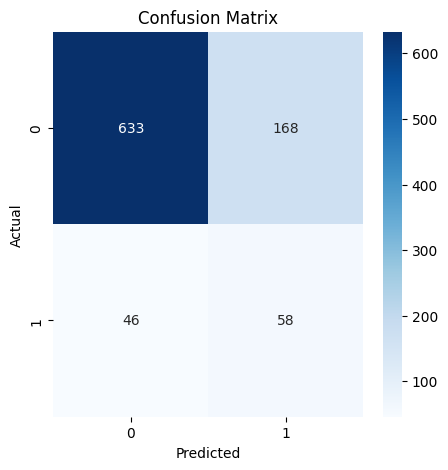

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

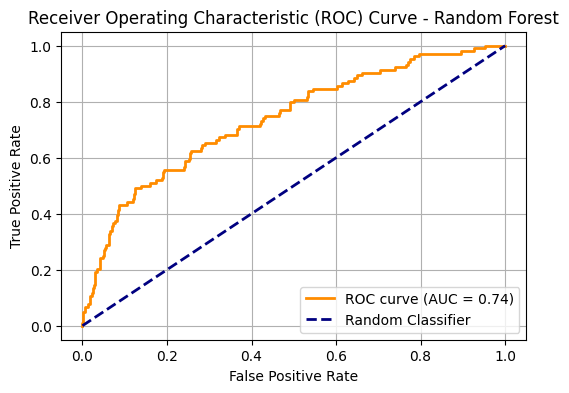

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Transform X_train and X_test using the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train_processed, y_train)
y_pred_rf = model_rf.predict(X_test_processed)


In [ ]:
# Simpan model random forest
import joblib

joblib.dump(best_model, "randomForest.pkl")


['randomForest.pkl']

# Deskripsi Model 3 (Deep Learning)

In [ ]:
# Arsitektur Model

In [ ]:
# Input dan Processing Khusus

In [ ]:
# Hyperparamter

In [ ]:
# Implementasi

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# The input dimension should be based on the processed data
# input_dim = X_train.shape[1] # This would be incorrect for unprocessed X_train
input_dim = X_train_processed.shape[1] # Use the shape of the processed data

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Model MPL
model_deep_learning = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Complie Model
model_deep_learning.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

# Training
history = model_deep_learning.fit(
    X_train_processed, y_train, # Use the preprocessed training data
    epochs = 10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7492 - auc: 0.4987 - loss: 0.5089 - val_accuracy: 0.8950 - val_auc: 0.6537 - val_loss: 0.3164
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8852 - auc: 0.6523 - loss: 0.3436 - val_accuracy: 0.8964 - val_auc: 0.7093 - val_loss: 0.3122
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8812 - auc: 0.6728 - loss: 0.3434 - val_accuracy: 0.8950 - val_auc: 0.7171 - val_loss: 0.3128
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8832 - auc: 0.6949 - loss: 0.3334 - val_accuracy: 0.8936 - val_auc: 0.7290 - val_loss: 0.3071
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8824 - auc: 0.6808 - loss: 0.3422 - val_accuracy: 0.8909 - val_auc: 0.7332 - val_loss: 0.3022
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8812 - auc: 0.7096 - loss: 0.3378 - val_accuracy: 0.8909 - val_auc: 0.7362 - val_loss: 0.3022
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [ ]:
# Akurasi hasil deep learning
# y_prediksi_dl = model_deep_learning.predict(X_test_processed)

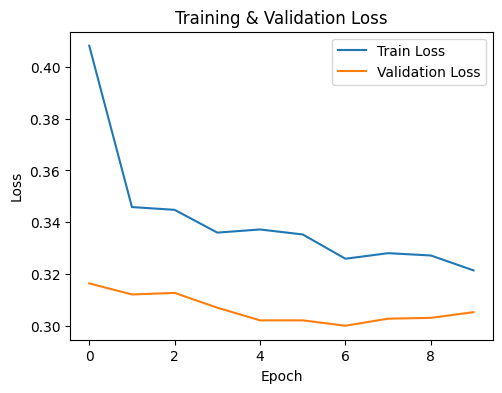

In [ ]:
# Training loss Visualization

history_get = history.history

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

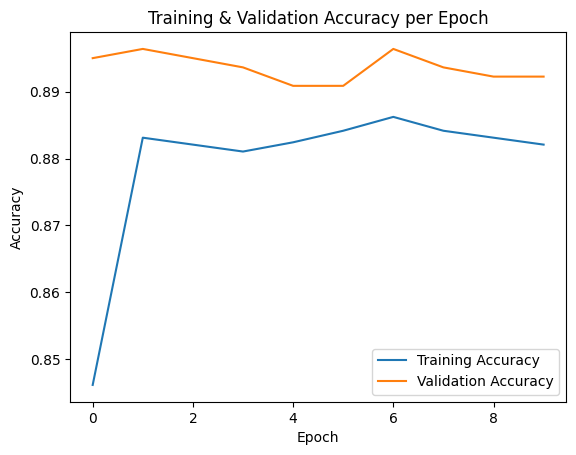

In [ ]:
# Plot Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy per Epoch')
plt.legend()
plt.show()

In [ ]:
# Prediksi Test tes
y_pred_dl = model_deep_learning.predict(X_test_processed)
y_proba_dl = model_deep_learning.predict(X_test_processed)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


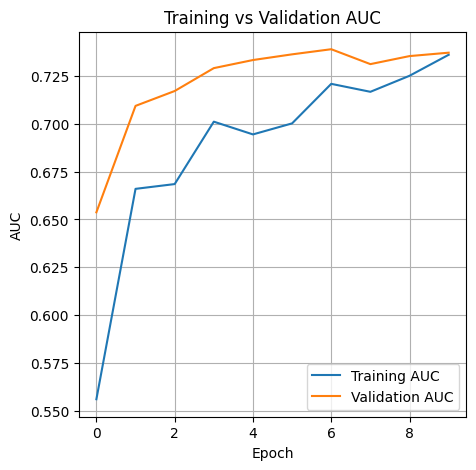

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Training vs Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Validation Loss

plt.figure(figsize=(5,5))
plt.plot(history_get['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Model Summary

model_deep_learning.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,709 (159.02 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,140 (106.02 KB)

In [ ]:
# Simpan model Deep Learning

model_deep_learning.save('BankDeepLearning.h5')

# 7. Evaluation

7.2.1 Model 1 (Baseline)

In [ ]:
y_pred_lr = best_model.predict(X_test)
y_proba_lr = best_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77       801
           1       0.20      0.65      0.30       104

    accuracy                           0.65       905
   macro avg       0.57      0.65      0.53       905
weighted avg       0.85      0.65      0.71       905

ROC AUC: 0.6997863247863249


7.2.2 Model 2 (Advanced/ML)

In [ ]:
y_pred_rf = model_rf.predict(X_test_processed)
y_proba_rf = rf.predict_proba(X_test_processed)[:,1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC: ", roc_auc_score(y_test, y_proba_rf))


              precision    recall  f1-score   support

           0       0.93      0.79      0.86       801
           1       0.26      0.56      0.35       104

    accuracy                           0.76       905
   macro avg       0.59      0.67      0.60       905
weighted avg       0.85      0.76      0.80       905

ROC-AUC:  0.7385119562085853


Text(33.22222222222222, 0.5, 'Actual')

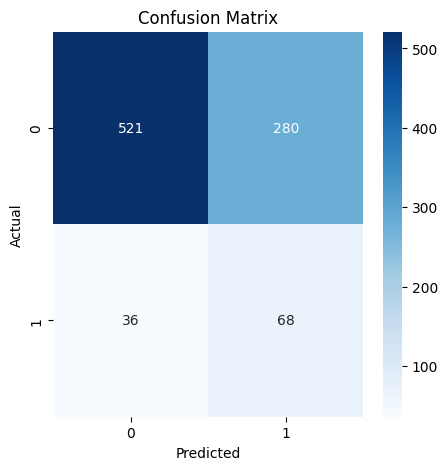

In [ ]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

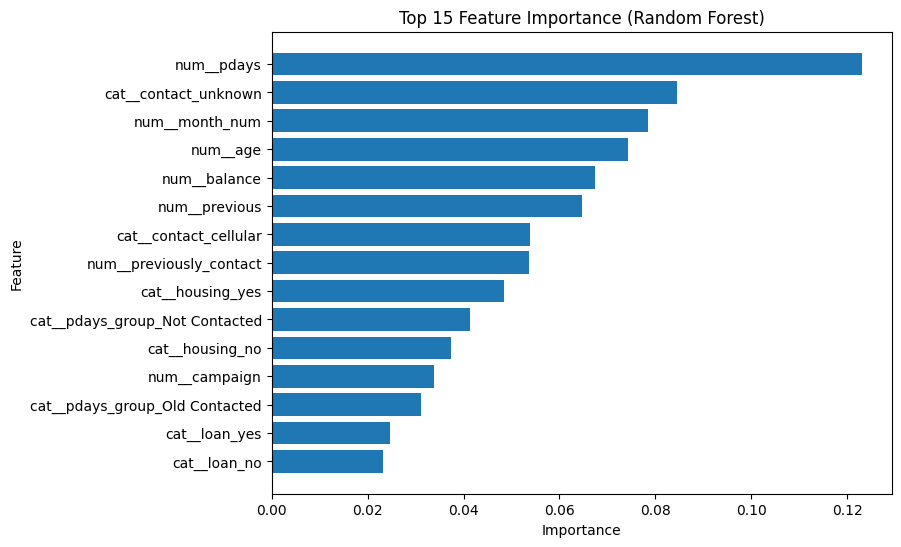

In [ ]:
# Ambil feature importance
importances = rf.feature_importances_

# Ambil nama fitur setelah preprocessing
feature_names = preprocessor.get_feature_names_out()

# Buat dataframe
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Ambil top 15 fitur terpenting
top_features = feat_imp.head(15)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

7.2.3 Model 3 (Deep Learning)

In [ ]:
y_proba_deepLearning = model_deep_learning.predict(X_test_processed).ravel()
y_pred_deepLearning = (y_proba_deepLearning >= 0.3).astype(int)

report_dl = classification_report(y_test, y_pred_deepLearning, output_dict=True)
acc_dl = report_dl["accuracy"]
f1_dl = report_dl["1"]["f1-score"] # F1-score for class 1 (yes)
auc_dl = roc_auc_score(y_test, y_proba_deepLearning)

print(classification_report(y_test, y_pred_deepLearning))
print("ROC-AUC: ", auc_dl)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       801
           1       0.33      0.11      0.16       104

    accuracy                           0.87       905
   macro avg       0.61      0.54      0.55       905
weighted avg       0.83      0.87      0.84       905

ROC-AUC:  0.7442979928934985


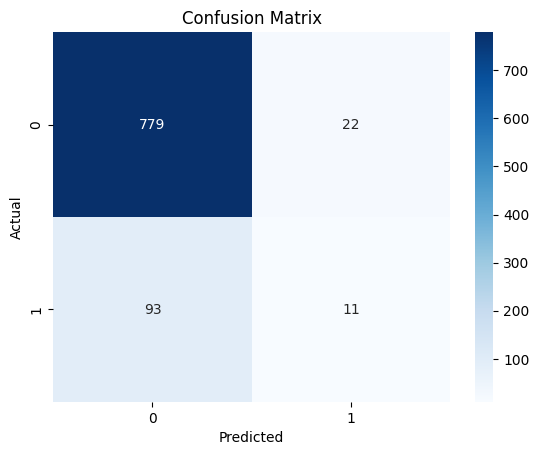

In [ ]:
confMatrix_DeepLearning = confusion_matrix(y_test, y_pred_deepLearning)
sns.heatmap(confMatrix_DeepLearning, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7.3 Perbandingan Ketiga Model

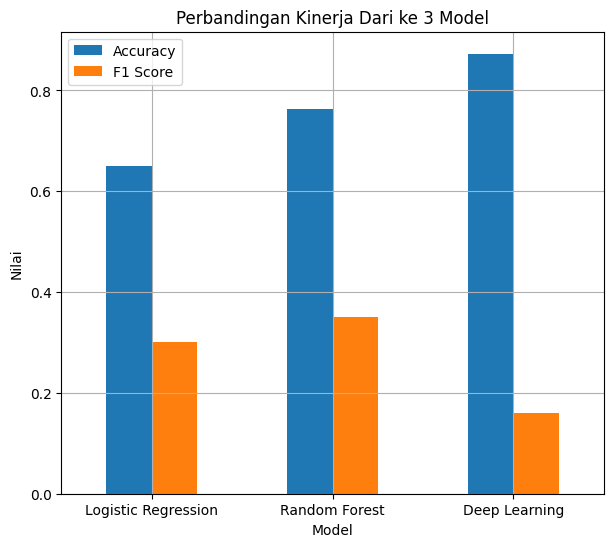

In [ ]:
# Visualisasi Perbandingan

hasil = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Random Forest', 'Deep Learning'],
    'Accuracy' : [acc_lr, acc_rf, acc_dl],
    'F1 Score' : [f1_lr, f1_rf, f1_dl],
})

hasil.set_index('Model').plot(kind='bar', figsize=(7,6))
plt.title('Perbandingan Kinerja Dari ke 3 Model')
plt.ylabel('Nilai')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()